<a href="https://colab.research.google.com/github/d93y70123123/AI/blob/master/20200604_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"

import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

model = tf.keras.Sequential([
  hub.KerasLayer(module_url,
                 input_shape=(299,299,3),
                 output_shape=(1001,),
                 name='Inception_V3')
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inception_V3 (KerasLayer)    (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


In [0]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    img_decode = img_decode / 255.0  # 對影像做正規畫，將數值縮放到0~1之間
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)  # 
    return img_decode

In [11]:
# 下載ImageNet 的標籤檔
import numpy as np
import matplotlib.pyplot as plt
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# 讀取標籤檔中的數據
with open(labels_path) as file:
    lines = file.read().splitlines()
print(lines)  # 顯示讀取的標籤

imagenet_labels = np.array(lines)  # 將標籤轉成numpy array做為網路輸出的解碼器

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', '

--2020-06-04 07:31:57--  https://media.gettyimages.com/photos/ripe-red-and-yellow-mango-isolated-on-a-white-background-picture-id937513974?b=1&k=6&m=937513974&s=612x612&w=0&h=BkfIUIzhyJWGxC5FCa9lMFWuF59eYQWHqAmw2qiWVnI=
Resolving media.gettyimages.com (media.gettyimages.com)... 52.84.23.93, 52.84.23.33, 52.84.23.74, ...
Connecting to media.gettyimages.com (media.gettyimages.com)|52.84.23.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19982 (20K) [image/jpeg]
Saving to: ‘mango.jpg’

mango.jpg           100%[===================>]  19.51K  --.-KB/s    in 0.003s  

2020-06-04 07:31:58 (5.98 MB/s) - ‘mango.jpg’ saved [19982/19982]

elephant.jpg  mango.jpg  sample_data


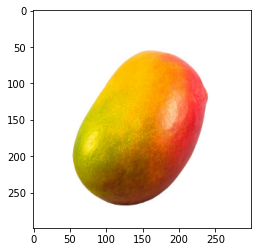

In [19]:
#! wget 'https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg' -O elephant.jpg
! wget 'https://media.gettyimages.com/photos/ripe-red-and-yellow-mango-isolated-on-a-white-background-picture-id937513974?b=1&k=6&m=937513974&s=612x612&w=0&h=BkfIUIzhyJWGxC5FCa9lMFWuF59eYQWHqAmw2qiWVnI=' -O mango.jpg
! ls 
img_path = 'mango.jpg'
img = read_img(img_path)  # 透過剛創建的函式讀取影像
plt.imshow(img[0])

In [20]:
preds = model.predict(img)  # 預測圖片
index = np.argmax(preds)  # 取得預測結果最大的Index
print("Predicted:", imagenet_labels[index])  # 透過解碼器將輸出轉成標籤

Predicted: pomegranate


In [21]:
# 取得預測結果最大的三個indexs
top3_indexs = np.argsort(preds)[0, ::-1][:3]  
print("Predicted:", imagenet_labels[top3_indexs])  # 透過解碼器將輸出轉成標籤

Predicted: ['pomegranate' 'Granny Smith' 'buckeye']
